In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [5]:
# load dataset
ds = pd.read_csv("CSF.csv", header=0)


In [6]:
#Now we are going to do some preprocessing on the dataset
#1- Check for null values
ds = ds.replace(' ', np.nan)                   # to get rid of empty values
nan_values = ds[ds.isna().any(axis=1)]         # to get all rows with Na
nan_values                                     # view df with NaN rows only


,Age,CellCount,NeuroCOVID,Immunosupressed,Presentation,ClinicalMetagenomics,Top10,FinalDiagnosis


In [8]:
ds

,Age,CellCount,NeuroCOVID,Immunosupressed,Presentation,ClinicalMetagenomics,Top10,FinalDiagnosis
0,0,0,1,0,1,0,3,Unknown
1,0,1,0,1,1,1,3,Unknown
2,0,2,0,0,1,0,3,Non-infectious
3,0,1,0,0,2,0,3,Non-infectious
4,0,1,0,1,2,0,1,Infectious
5,0,1,0,1,3,2,3,Unknown
6,0,1,0,0,4,0,3,Infectious
7,0,1,0,2,7,0,2,Non-infectious
8,0,0,0,1,1,0,3,Non-infectious
9,0,1,0,1,1,0,2,Non-infectious


In [9]:
#split dataset in features and class label
features = ds.iloc[:,:-1] # Features (Splitting all the columns except the last one)
label = ds.iloc[:,-1:] # Target variable (extract the last column)

In [10]:
# Split dataset into training set and test set
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=1) # 80% training and 20% test


In [11]:
from sklearn.feature_selection import SelectFromModel

# Create a decision tree classifier for feature importance
dt_for_feature_importance = DecisionTreeClassifier(criterion="entropy")
dt_for_feature_importance.fit(features_train, label_train)

# Select features based on importance
model = SelectFromModel(dt_for_feature_importance, prefit=True)
features_train_selected = model.transform(features_train)
features_test_selected = model.transform(features_test)


/Users/mohammedfarahat/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/mohammedfarahat/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [41]:
# Create Decision Tree classifer object
DTCls = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
DTCls = DTCls.fit(features_train,label_train)

#Predict the response for test dataset
label_pred = DTCls.predict(features_test)


In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(label_test, label_pred))


Accuracy: 0.2727272727272727


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
pip install six

In [ ]:
# from sklearn.tree import export_graphviz
# from six import StringIO  
# from IPython.display import Image  
# import pydotplus
# import graphviz

# dot_data = StringIO()
# export_graphviz(DTCls, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('DT.png')
# Image(graph.create_png())


In [34]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


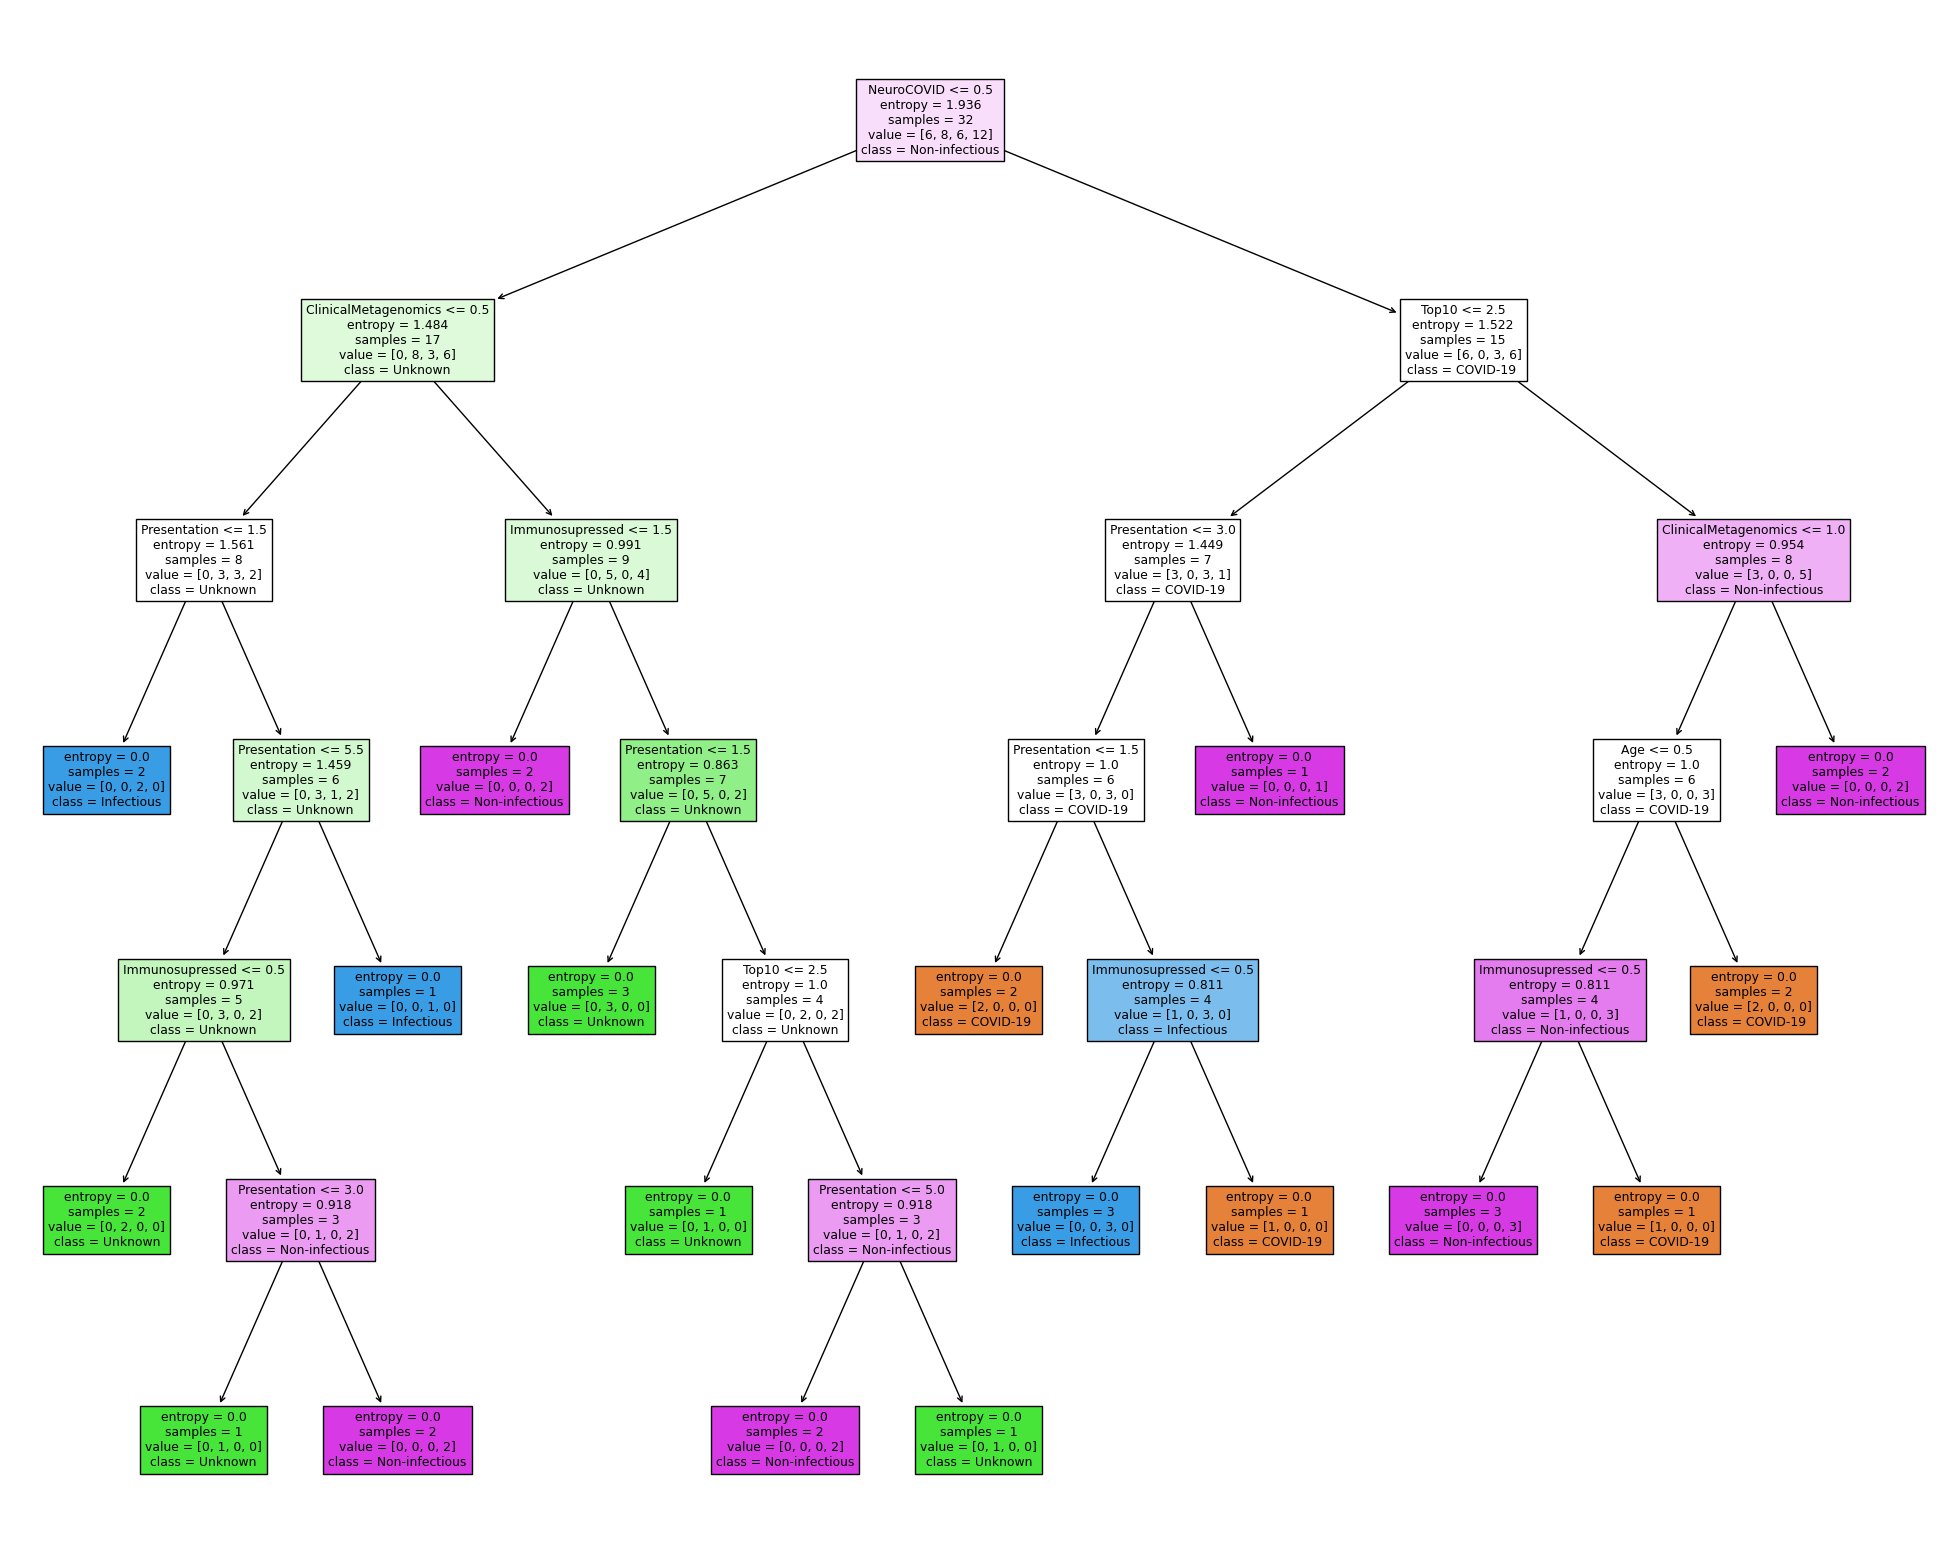

In [43]:
from matplotlib import pyplot as plt
from sklearn import tree

fn=features_train.columns.values.tolist()
ln=label_train.columns.values.tolist()
lnname=label_train['FinalDiagnosis'].unique().tolist()
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTCls,
                   feature_names=fn,
                class_names=lnname,
                   filled=True)
fig.savefig('DecisionTree')

In [25]:
from sklearn.tree import export_text
tree_rules = export_text(DTCls, feature_names=list(features_train.columns))
text_file = open("tree.txt", "wt")
n = text_file.write(tree_rules)
text_file.close()
